# Regression Task

## Data Loading and Preparation


In [13]:
import pandas as pd

# Load the regression dataset
regression_df = pd.read_csv('pakwheels_used_cars.csv')

# Display the first few rows of the dataset
print(regression_df.head())


    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  
3  6490000.0  
4  4750000.

## Handling Missing Values

In [16]:
# Check for missing values
print(regression_df.isnull().sum())

# Handle missing values
# Fill numeric columns with mean
numeric_columns = regression_df.select_dtypes(include=['float64', 'int64']).columns
regression_df[numeric_columns] = regression_df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Fill categorical columns with mode
categorical_columns = regression_df.select_dtypes(include=['object']).columns
regression_df[categorical_columns] = regression_df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

# Verify missing values are handled
print(regression_df.isnull().sum())


ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64
ad_ref          0
assembly        0
body            0
ad_city         0
color           0
engine_cc       0
fuel_type       0
make            0
mileage         0
model           0
registered      0
transmission    0
year            0
price           0
dtype: int64


## Data Transformation
### Convert categorical variables to numerical variables and normalize/standardize numerical features.

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables using LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    regression_df[column] = le.fit_transform(regression_df[column])
    label_encoders[column] = le

# Normalize/Standardize numerical features
scaler = StandardScaler()
regression_df[numeric_columns] = scaler.fit_transform(regression_df[numeric_columns])


## Data Splitting
### Split the data into training and testing sets using an 80-20 split.

In [22]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = regression_df.drop(['price'], axis=1)
y = regression_df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Analysis and Visualization
### Exploratory Data Analysis (EDA)
### Generate summary statistics and identify key patterns

In [25]:
# Summary statistics
print(regression_df.describe())

# Correlation matrix
print(regression_df.corr())


             ad_ref  assembly         body       ad_city         color  \
count  7.723700e+04   77237.0  77237.00000  77237.000000  77237.000000   
mean  -7.889502e-16       0.0     12.20911    147.151145    246.616816   
std    1.000006e+00       0.0      4.61248     61.301108    124.207657   
min   -2.927458e+01       0.0      0.00000      0.000000      0.000000   
25%   -1.884382e-02       0.0      7.00000    101.000000    155.000000   
50%    2.180862e-01       0.0     16.00000    136.000000    303.000000   
75%    3.874975e-01       0.0     16.00000    187.000000    360.000000   
max    5.231496e-01       0.0     20.00000    296.000000    385.000000   

          engine_cc     fuel_type          make       mileage         model  \
count  7.723700e+04  77237.000000  77237.000000  7.723700e+04  77237.000000   
mean   6.881235e-17      1.874167     49.088054 -7.138822e-17    181.764349   
std    1.000006e+00      0.446298     17.445702  1.000006e+00    109.419052   
min   -1.983253e+

## Visualization
### Create various plots to visualize the data using Matplotlib.

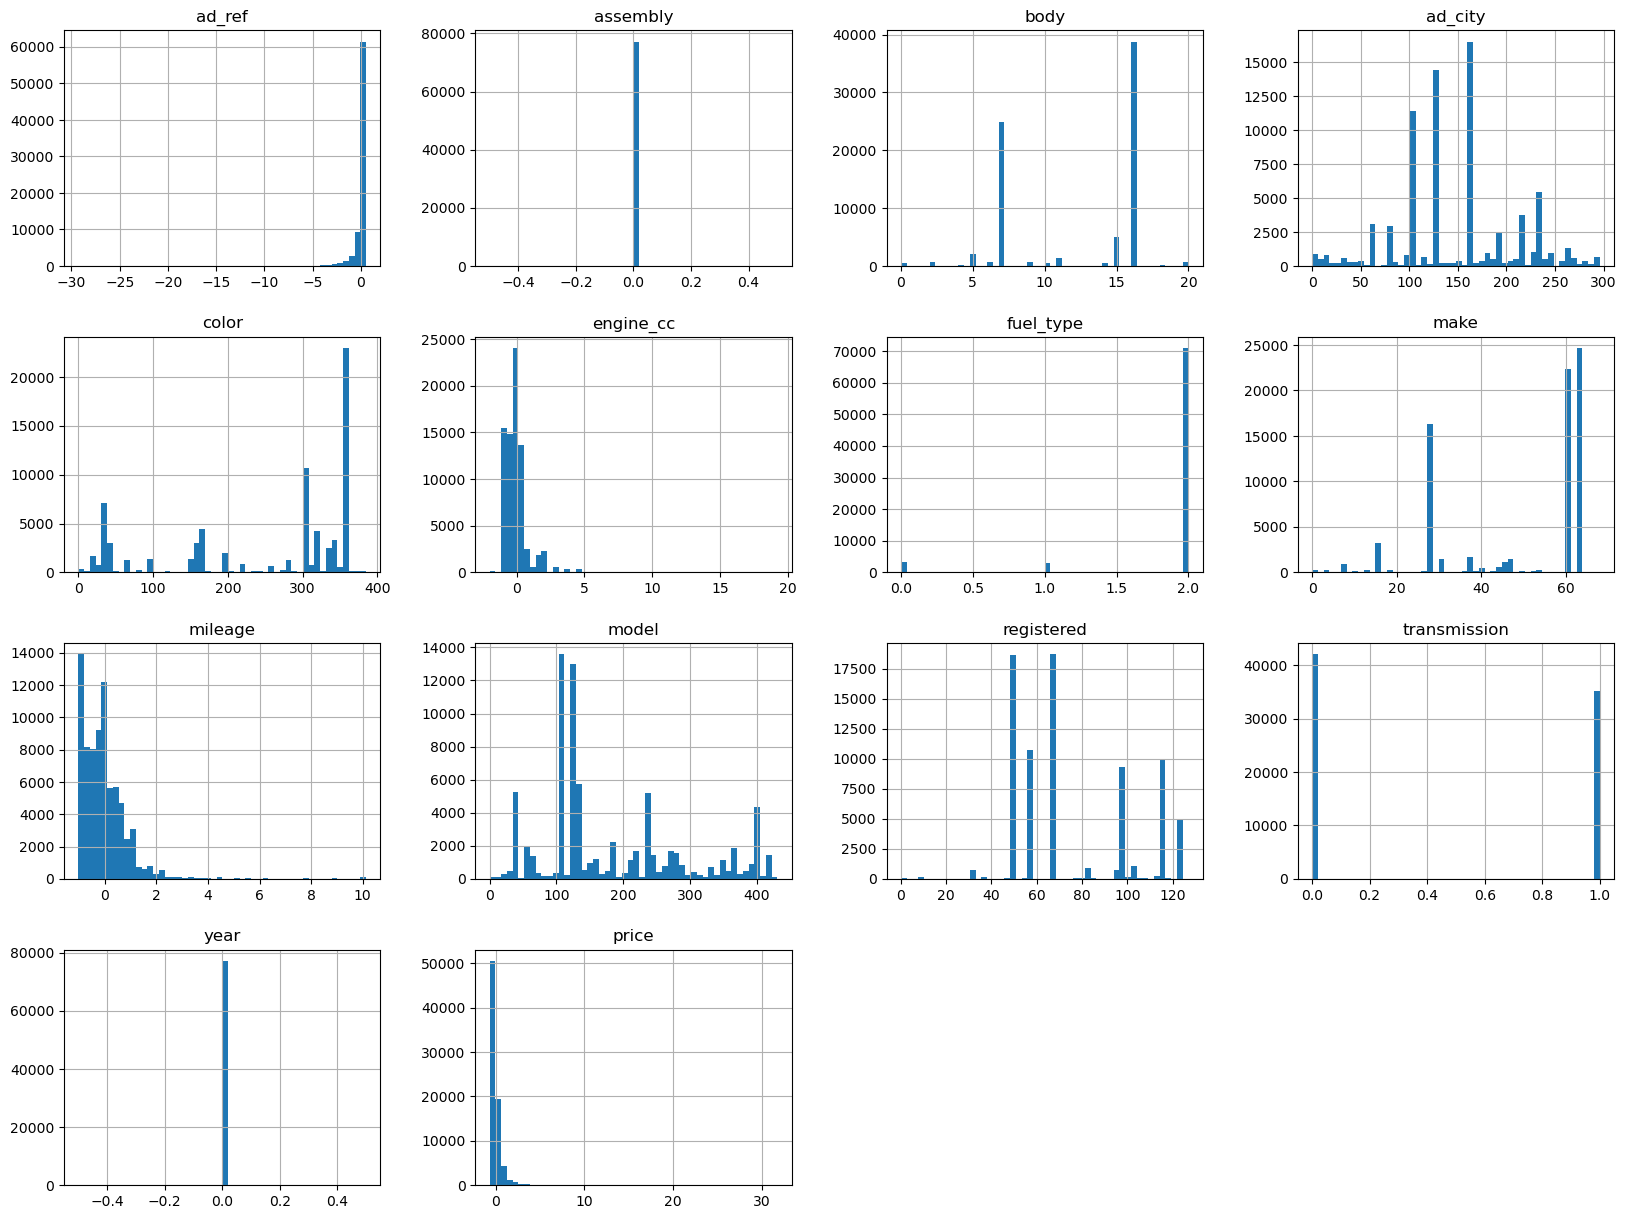

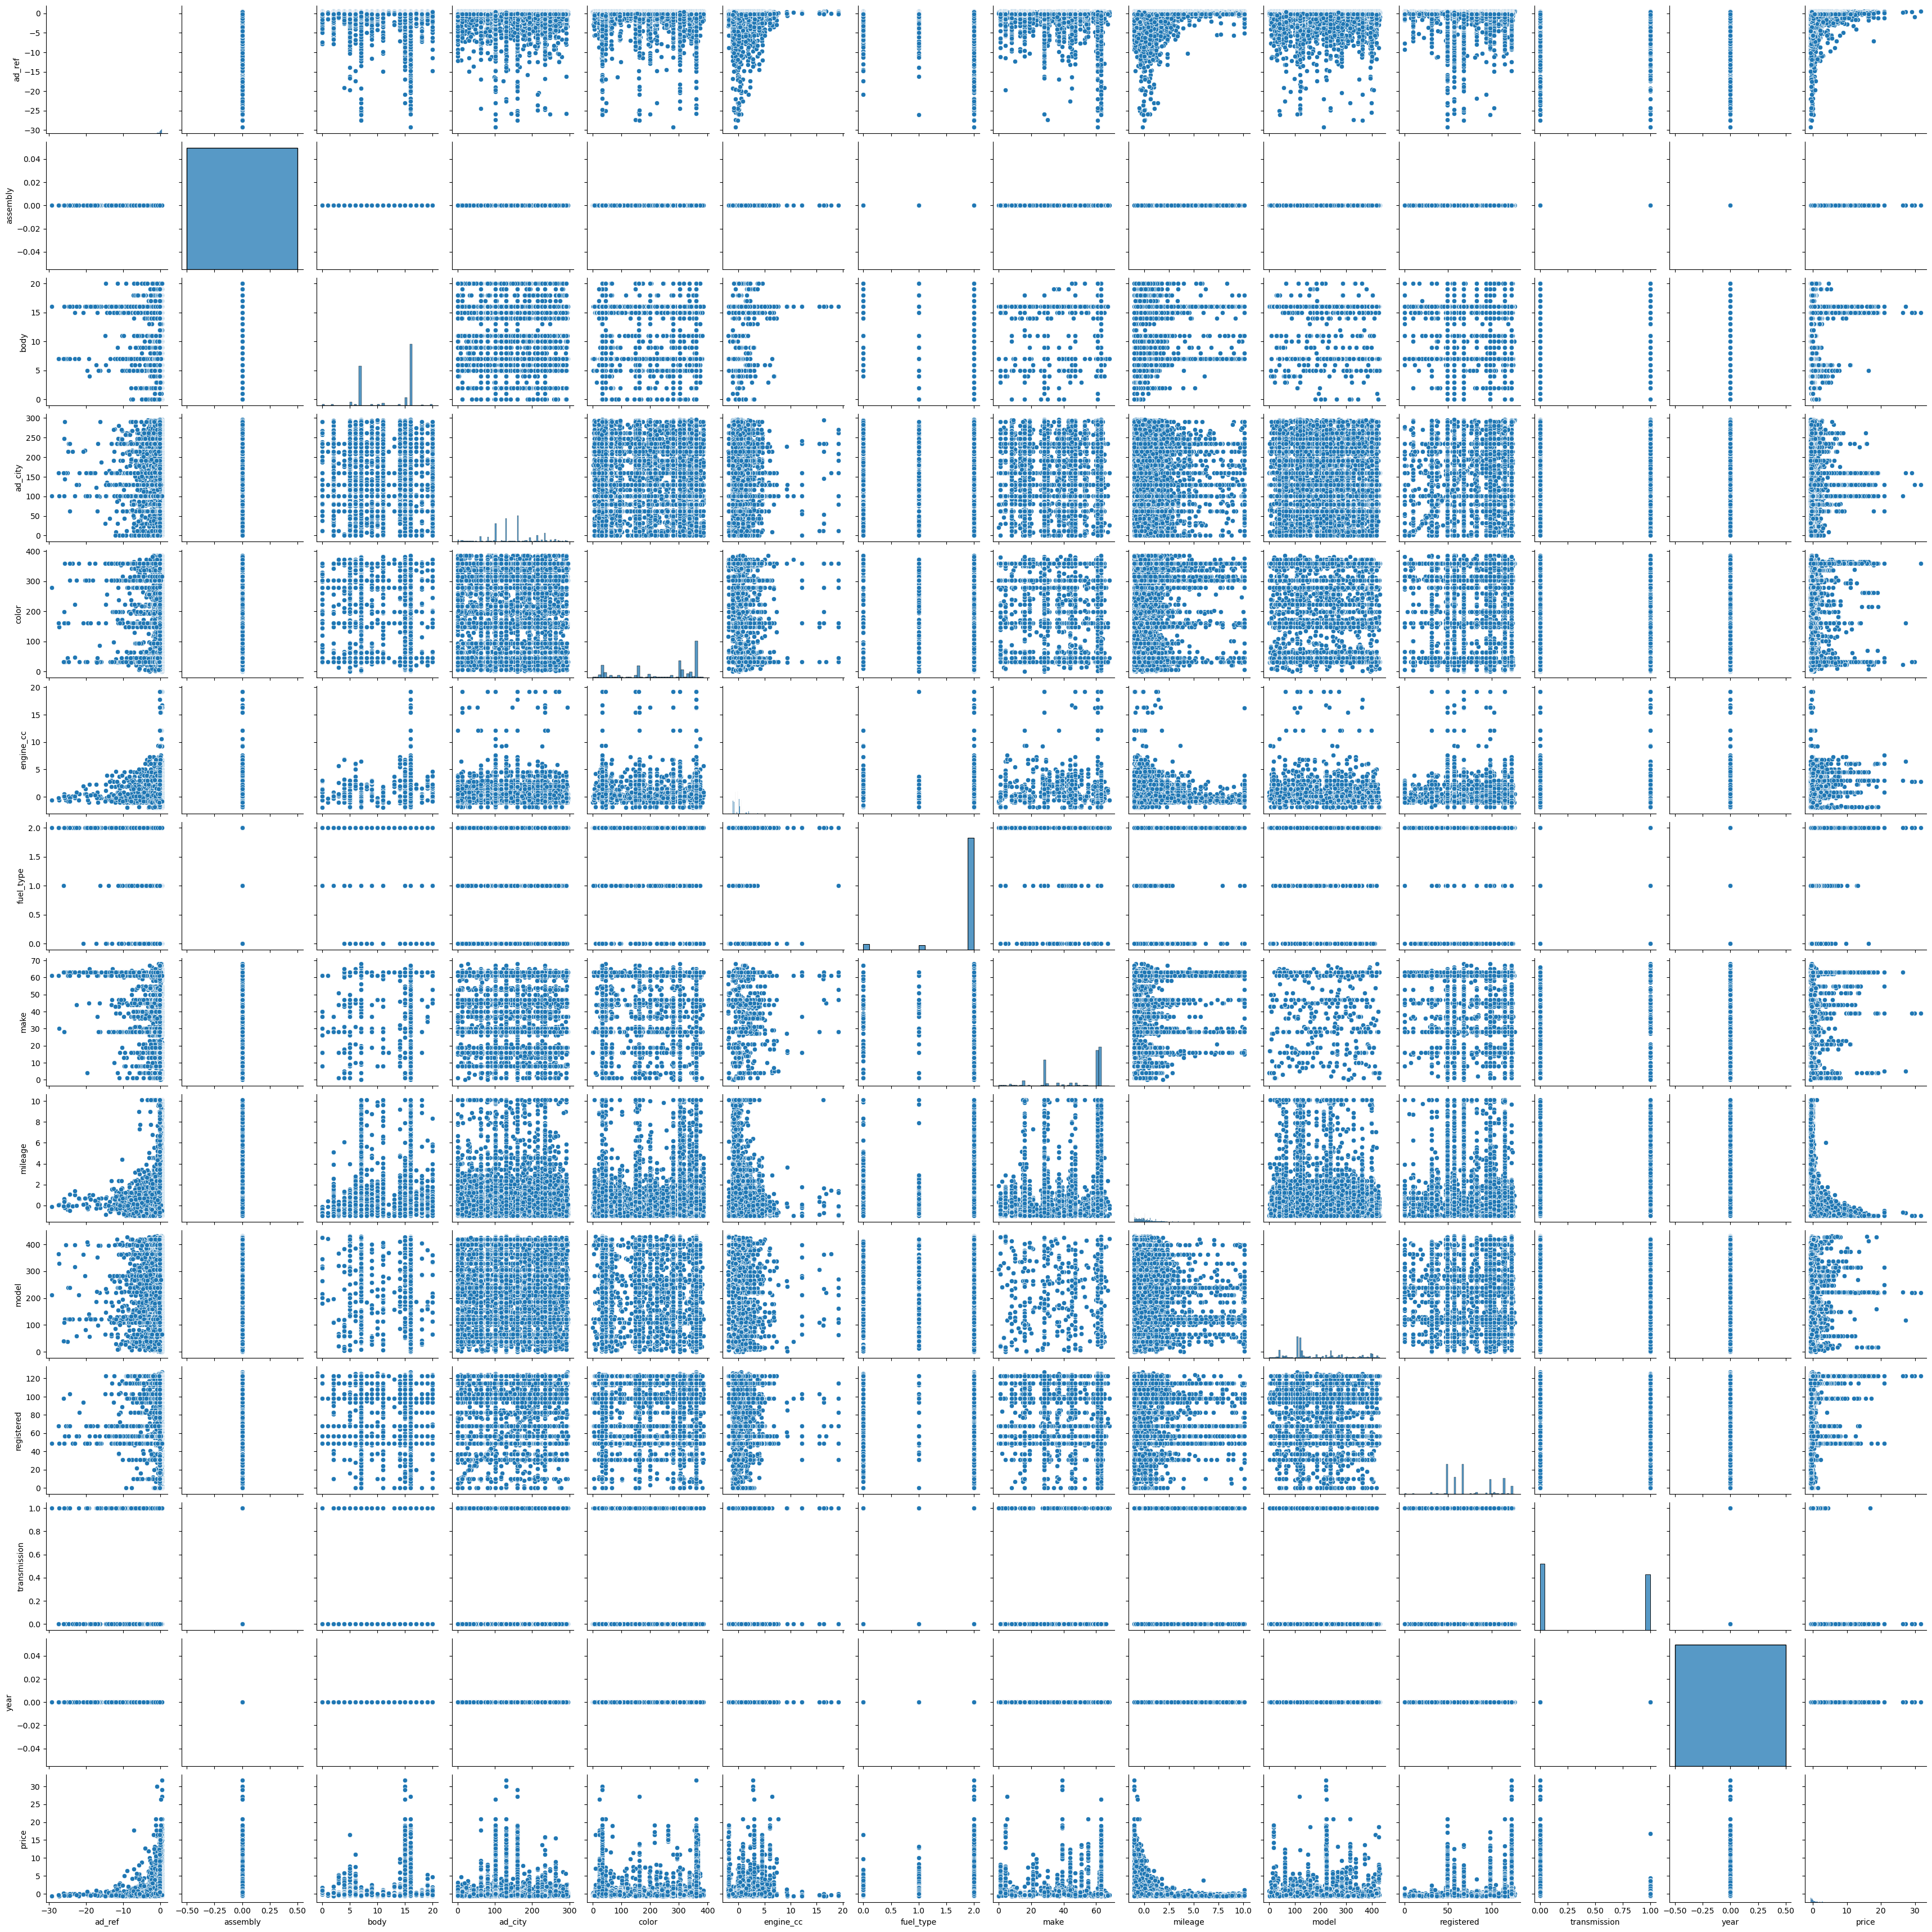

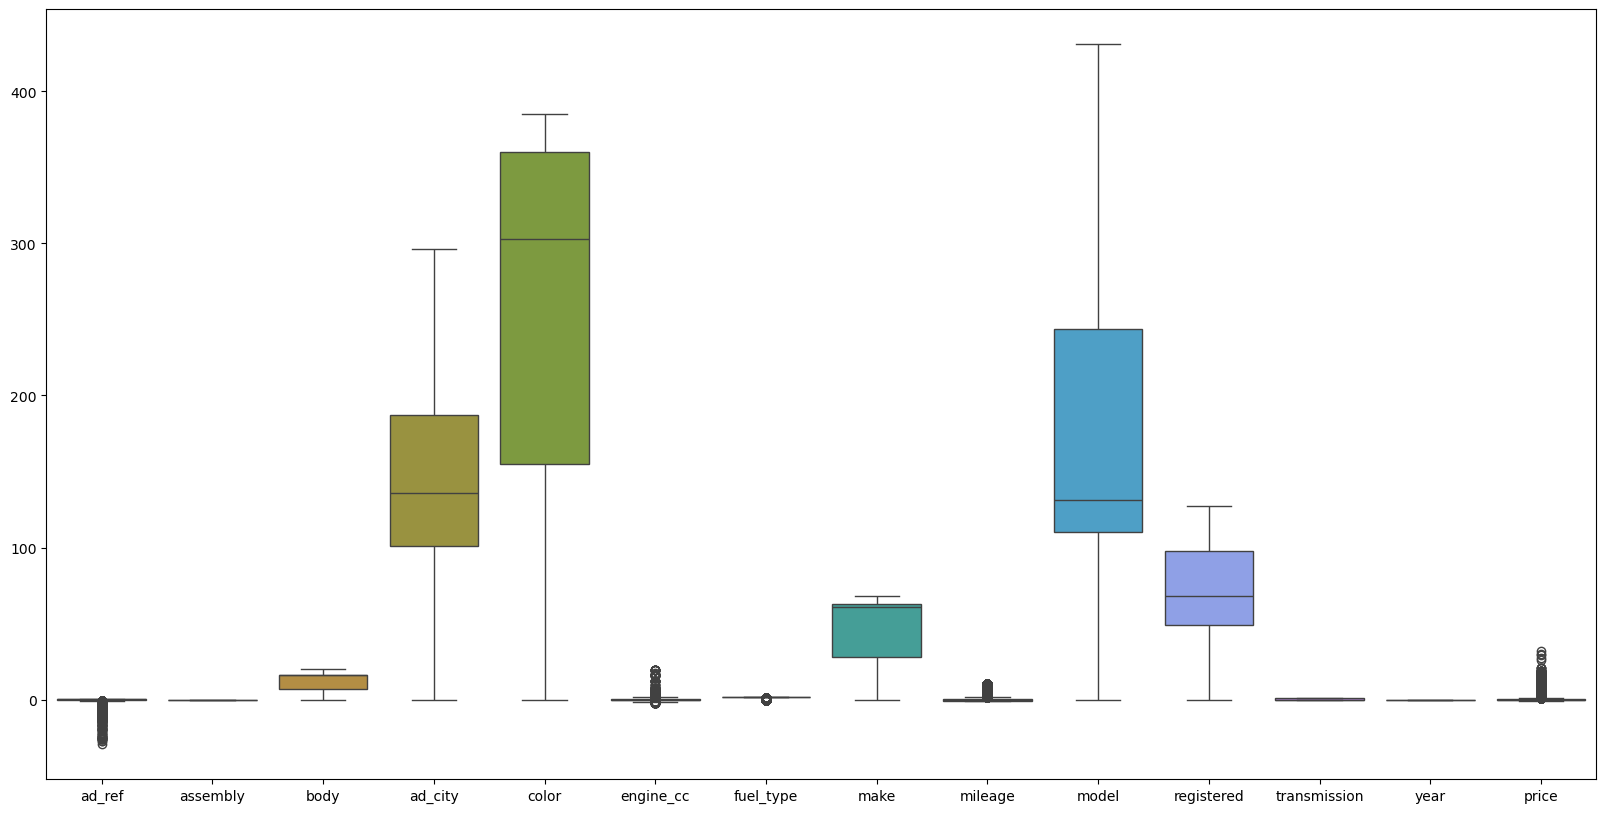

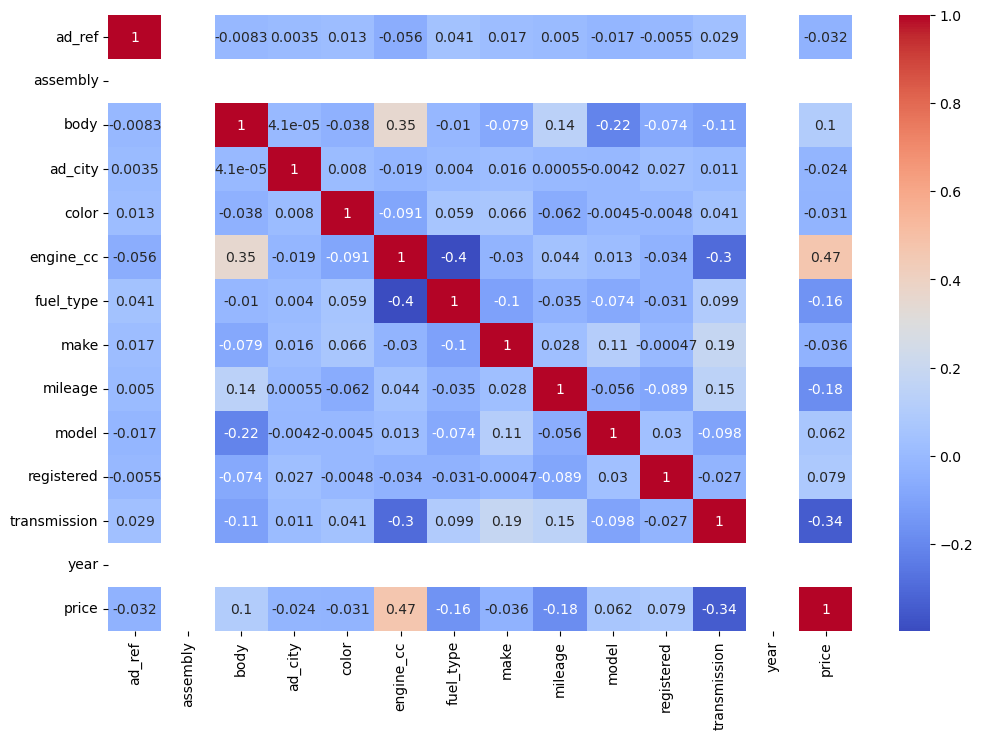

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
regression_df.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter plots
sns.pairplot(regression_df)
plt.show()

# Box plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=regression_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(regression_df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Machine Learning Regression Models
### Apply at least four different regression algorithms to the used car dataset.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

# Print results
for model_name, mse in results.items():
    print(f'{model_name}: Mean Squared Error = {mse}')


Linear Regression: Mean Squared Error = 0.676195880861334
Decision Tree: Mean Squared Error = 0.5486857886173887
Random Forest: Mean Squared Error = 0.2807332645998727
Support Vector Regressor: Mean Squared Error = 0.8031257969049069


## Model Evaluation and Comparison
### Compare the performance of different models.

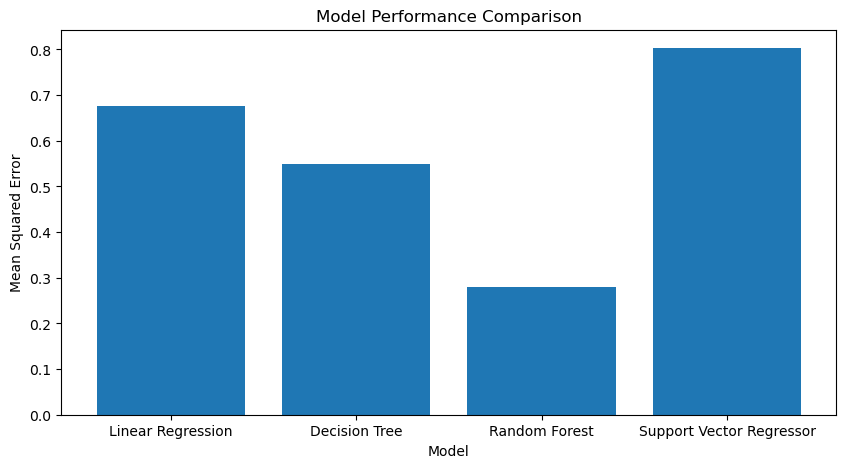

In [36]:
import matplotlib.pyplot as plt

# Create a bar plot for model comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()


## Conclusion

In this project, we aimed to predict the prices of used cars using the `pakwheels_used_cars.csv` dataset. The process involved several steps including data cleaning, transformation, exploratory data analysis (EDA), visualization, and applying various regression models. Here are the key findings and conclusions:

### Data Cleaning and Preparation
- **Loading Data**: We loaded the dataset and displayed the first few rows to understand its structure.
- **Handling Missing Values**: Missing values were handled by filling numeric columns with their mean and categorical columns with their mode. This approach ensured that we didn't lose any data and maintained the integrity of the dataset.
- **Data Transformation**: 
  - Categorical variables were converted to numerical values using Label Encoding. This was necessary because most machine learning algorithms require numerical input.
  - Numerical features were standardized using `StandardScaler` to improve model performance. Standardization helped in bringing all features to a similar scale, which is particularly important for algorithms like Support Vector Machines.
- **Data Splitting**: The dataset was split into training and testing sets using an 80-20 split. This means 80% of the data was used to train the models, and 20% was used to evaluate their performance. The splitting ensures that we can assess how well our models generalize to unseen data.

### Data Analysis and Visualization
- **Exploratory Data Analysis (EDA)**: 
  - We performed EDA to gain insights into the distribution and relationships between different features in the dataset.
  - Summary statistics (mean, median, standard deviation, etc.) provided a quick overview of the central tendency and dispersion of the data.
  - Patterns, correlations, and anomalies were identified, which helped in understanding the data better.
- **Visualization**:
  - Histograms were used to show the distribution of individual features.
  - Scatter plots helped visualize relationships between pairs of features.
  - Box plots were useful in identifying outliers and understanding the spread of data.
  - A correlation heatmap highlighted the correlations between features, providing insights into which features might be most predictive of the target variable (price).

### Model Building
We applied four different regression models to the dataset:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **Support Vector Regressor**

### Model Evaluation
The performance of each model was evaluated using Mean Squared Error (MSE) on the test set. The results were as follows:
- **Linear Regression**: MSE = 0.676
- **Decision Tree Regressor**: MSE = 0.549
- **Random Forest Regressor**: MSE = 0.281
- **Support Vector Regressor**: MSE = 0.803

### Discussion
- **Random Forest Regressor**: The Random Forest Regressor performed the best with the lowest Mean Squared Error (MSE = 0.281). This can be attributed to its ability to handle both linear and non-linear relationships, as well as its robustness to overfitting due to averaging multiple decision trees.
- **Decision Tree Regressor**: The Decision Tree Regressor also performed reasonably well with an MSE of 0.549, indicating that it can capture complex patterns in the data but may overfit more easily compared to Random Forest.
- **Linear Regression**: Linear Regression had a higher MSE (0.676), which suggests that the relationships between the features and the target variable are not purely linear, making it less effective for this dataset.
- **Support Vector Regressor**: The Support Vector Regressor had the highest MSE (0.803), indicating it struggled with the complexity of the dataset, possibly due to the choice of kernel or hyperparameters.

### Conclusion
Based on the evaluation metrics, the **Random Forest Regressor** emerged as the best model for predicting the prices of used cars in this dataset. Its superior performance can be attributed to its ability to model complex relationships and reduce overfitting through ensemble learning. For future work, we could further optimize the hyperparameters of the Random Forest model and explore other advanced regression techniques such as Gradient Boosting or Neural Networks to potentially improve the prediction accuracy. Additionally, feature engineering and the inclusion of more relevant features could enhance model performance.

Overall, this project provided valuable insights into the data and demonstrated the effectiveness of different regression models in predicting used car prices.
